# Capital One Assessment

## Clone repo with data and extract zip

On terminal:

git clone https://github.com/CapitalOneRecruiting/DS

In [240]:
zip_path = "DS/"
file_name = "transactions.zip"

Run the following code to unzip if needed:

In [241]:
# import zipfile
# with zipfile.ZipFile(zip_path+file_name, 'r') as zip_ref:
#     zip_ref.extractall(zip_path)

## Explore Data

In [242]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

SEED = 10

In [243]:
data = []
for line in open(zip_path + 'transactions.txt', 'r'):
    data.append(json.loads(line))

In [244]:
print("Number of records: {}".format(len(data)))

Number of records: 786363


In [245]:
raw_df = pd.DataFrame(data)

print("Data shape {}".format(raw_df.shape))
raw_df.head(10)

Data shape (786363, 29)


,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000.0,5000.00,2016-08-13T14:27:32,98.55,Uber,US,US,02,...,,0.00,,,,False,,,False,False
1,737265056,737265056,5000.0,5000.00,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,...,,0.00,,,,True,,,False,False
2,737265056,737265056,5000.0,5000.00,2016-11-08T09:18:39,7.47,Play Store,US,US,09,...,,0.00,,,,False,,,False,False
3,737265056,737265056,5000.0,5000.00,2016-12-10T02:14:50,7.47,Play Store,US,US,09,...,,0.00,,,,False,,,False,False
4,830329091,830329091,5000.0,5000.00,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,...,,0.00,,,,True,,,False,False
5,830329091,830329091,5000.0,5000.00,2016-04-19T16:24:27,30.76,In-N-Out #422833,US,US,02,...,,0.00,,,,True,,,False,False
6,830329091,830329091,5000.0,5000.00,2016-05-21T14:50:35,57.28,Krispy Kreme #685312,US,US,02,...,,0.00,,,,True,,,False,False
7,830329091,830329091,5000.0,5000.00,2016-06-03T00:31:21,9.37,Shake Shack #968081,US,US,05,...,,0.00,,,,True,,,False,False
8,830329091,830329091,5000.0,4990.63,2016-06-10T01:21:46,523.67,Burger King #486122,,US,02,...,,9.37,,,,True,,,False,False
9,830329091,830329091,5000.0,5000.00,2016-07-11T10:47:16,164.37,Five Guys #510989,US,US,05,...,,0.00,,,,True,,,False,False


- Given that missing values are represented as missing strings, these are being replaced with np.nan in order to differentiate them better

### Missing Values

In [246]:
raw_df = raw_df.replace('', np.nan)

In [247]:
count_nan = len(raw_df) - raw_df.count()
print("Missing Values in data:\n")
count_nan[count_nan > 0]

Missing Values in data:



acqCountry               4562
merchantCountryCode       724
posEntryMode             4054
posConditionCode          409
transactionType           698
echoBuffer             786363
merchantCity           786363
merchantState          786363
merchantZip            786363
posOnPremises          786363
recurringAuthInd       786363
dtype: int64

- It looks like many there are columns with some missing values and others that are completely missing

In [248]:
all_missing = count_nan[count_nan == 786363]
print("Columns with all values missing:\n")
all_missing

Columns with all values missing:



echoBuffer          786363
merchantCity        786363
merchantState       786363
merchantZip         786363
posOnPremises       786363
recurringAuthInd    786363
dtype: int64

- These columns will not contribute to analysis/modeling as they are missing so, they will be removed.

In [249]:
raw_df.drop(all_missing.index, axis=1, inplace=True)


In [250]:
some_missing_cols = count_nan[(count_nan > 0) & (count_nan < 786363)]
some_missing_cols

acqCountry             4562
merchantCountryCode     724
posEntryMode           4054
posConditionCode        409
transactionType         698
dtype: int64

In [251]:
print("Dataframe Info:\n")
raw_df.info(verbose = True)

Dataframe Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             786363 non-null  object 
 1   customerId                786363 non-null  object 
 2   creditLimit               786363 non-null  float64
 3   availableMoney            786363 non-null  float64
 4   transactionDateTime       786363 non-null  object 
 5   transactionAmount         786363 non-null  float64
 6   merchantName              786363 non-null  object 
 7   acqCountry                781801 non-null  object 
 8   merchantCountryCode       785639 non-null  object 
 9   posEntryMode              782309 non-null  object 
 10  posConditionCode          785954 non-null  object 
 11  merchantCategoryCode      786363 non-null  object 
 12  currentExpDate            786363 non-null  object 
 13  accountOpenDate           7

- There's a few floats and bool columns. Most of them are object which could mean that they are categorical.

### Data types and understanding categorical columns

Changing booleans to 1 or 0

In [252]:
raw_df.replace({ False : 0, True : 1}, inplace = True)

In [253]:
print("Number of unique values per colum:\n")

with pd.option_context('display.max_rows', None):
    print(raw_df.apply(pd.Series.nunique))

Number of unique values per colum:

accountNumber                 5000
customerId                    5000
creditLimit                     10
availableMoney              521916
transactionDateTime         776637
transactionAmount            66038
merchantName                  2490
acqCountry                       4
merchantCountryCode              4
posEntryMode                     5
posConditionCode                 3
merchantCategoryCode            19
currentExpDate                 165
accountOpenDate               1820
dateOfLastAddressChange       2184
cardCVV                        899
enteredCVV                     976
cardLast4Digits               5246
transactionType                  3
currentBalance              487318
cardPresent                      2
expirationDateKeyInMatch         2
isFraud                          2
dtype: int64


- It looks like the floats and bool columns align with the unique values per column observed.
- There are many dates in each of the date columns (e.g., transactionDateTime, accountOpenDate) which makes me think these are dates that will just need to be converted into datetime.
- The card identifier columns are type oject as well. 
- As for the rest of the object columns, they appear to be categorical features - they have a few unique values. 

In [254]:
np.where(raw_df['accountNumber'] == raw_df['customerId'], 1, 0).mean()

1.0

- customerId is always the same as accountNumber

[]

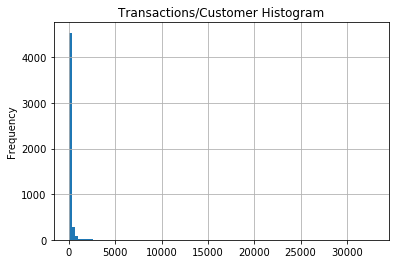

In [255]:
ax = raw_df.groupby('customerId')['customerId'].count().hist(bins = 100)

ax.set_title('Transactions/Customer Histogram')

ax.set_ylabel("Frequency")

ax.plot()

- This is a skewed distribution where most customerIds have a few transactions and a few of the customerIds have most of the transactions

In [256]:
pd.crosstab(raw_df.isFraud, raw_df.transactionType)

transactionType,ADDRESS_VERIFICATION,PURCHASE,REVERSAL
isFraud,,,
0,20053,733243,19966
1,116,11950,337


- Most of the transaction tupes are Purchases but each type can result in fraud

In [257]:
pd.crosstab(raw_df.acqCountry, raw_df.merchantCountryCode)

merchantCountryCode,CAN,MEX,PR,US
acqCountry,,,,
CAN,2413,0,0,11
MEX,0,3109,0,21
PR,0,0,1536,2
US,4,18,11,774673


- The merchant code and acq code don't always align - it could be worth adding a feature that captures that discrepancy for a fradu model

### Understanding class balance 

In [258]:
raw_df.isFraud.value_counts()

0    773946
1     12417
Name: isFraud, dtype: int64

In [259]:
raw_df.isFraud.value_counts(normalize = True)

0    0.98421
1    0.01579
Name: isFraud, dtype: float64

- This is a highly imbalanced dataset with the vast majority of entries corresponding to normal transactions

### Continuous Distributions

In [260]:
raw_df.describe()

,creditLimit,availableMoney,transactionAmount,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
count,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000
mean,10759.464459,6250.725369,136.985791,4508.739089,0.448734,0.001326,0.015790
std,11636.174890,8880.783989,147.725569,6457.442068,0.497365,0.036395,0.124664
min,250.000000,-1005.630000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5000.000000,1077.420000,33.650000,689.910000,0.000000,0.000000,0.000000
50%,7500.000000,3184.860000,87.900000,2451.760000,0.000000,0.000000,0.000000
75%,15000.000000,7500.000000,191.480000,5291.095000,1.000000,0.000000,0.000000
max,50000.000000,50000.000000,2011.540000,47498.810000,1.000000,1.000000,1.000000


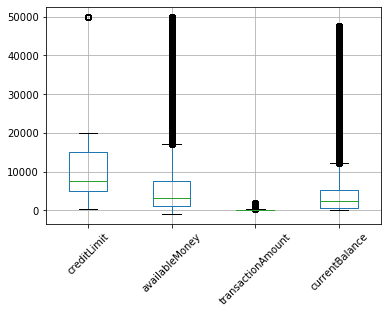

In [261]:
raw_df[['creditLimit', 'availableMoney' ,'transactionAmount', 'currentBalance']].boxplot(rot = 45)

Visualizing transactionAmount on it's own scale given the large observed differences

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9f588d4cd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9f588d4b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9f588d4c90>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9f588e7dd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9f588e0ed0>],
 'means': []}

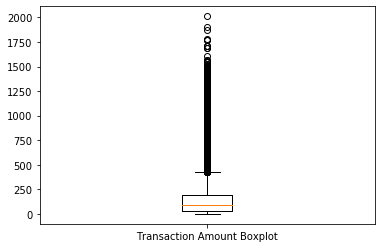

In [262]:
plt.boxplot(raw_df['transactionAmount'], labels = ['Transaction Amount Boxplot'])

[]

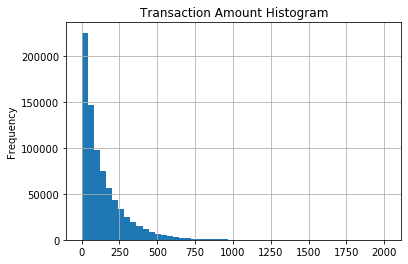

In [263]:
ax = raw_df['transactionAmount'].hist(bins = 50)

ax.set_title('Transaction Amount Histogram')

ax.set_ylabel("Frequency")

ax.plot()

- The transaction amount distrubution is right skwed wich makes sense given different spending patterns from people with different financial conditions - there's a few high-spending transactions that are very high, with most transactions being smaller 
- Available money and current balance seem to follow a similar distribution
- Credit limit seems to have one significantly set of outliers with the distribution appearing more normal otherwise

### Understanding data timeframe

Converting to datetime and extracting useful time identifiers

In [264]:
raw_df['transactionDateTime'] = pd.to_datetime(raw_df['transactionDateTime'])
raw_df['transaction_Day'] = raw_df['transactionDateTime'].dt.date
raw_df['transaction_Week'] = raw_df['transactionDateTime'].dt.week
raw_df['transaction_Month'] = raw_df['transactionDateTime'].dt.month

print("Date for first entry: {}".format(raw_df.transactionDateTime.min()))
print("Date for last entry: {}".format(raw_df.transactionDateTime.max()))

Date for first entry: 2016-01-01 00:01:02
Date for last entry: 2016-12-30 23:59:45


[]

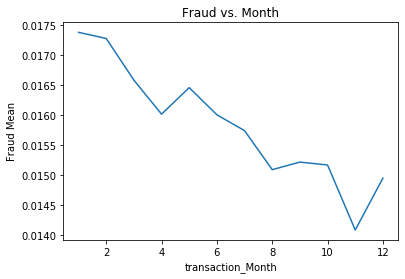

In [265]:
ax = raw_df.groupby('transaction_Month')['isFraud'].mean().plot(
    title = 'Fraud vs. Month')

ax.set_ylabel("Fraud Mean")

ax.plot()

- It looks like there is a negative relationship between fraud and transaction month.
    - This could be a function of how the fraud labels are collected/updated (i.e., if it takes time to determine if a transaction is fradulent, it make take some time for the data logs to reflect it
    - Another alaternative is that there is indeed a negative relationship between month of year and fraud; in this case, this or another time grouping could be used as a feature/set of features for a fraud model

In [266]:
raw_df['transaction_Quarter'] = raw_df['transactionDateTime'].dt.quarter
raw_df['transaction_Quarter'] = raw_df['transaction_Quarter'].astype(str)
raw_df['transaction_Quarter'].value_counts()

4    206700
3    202065
2    193057
1    184541
Name: transaction_Quarter, dtype: int64

[]

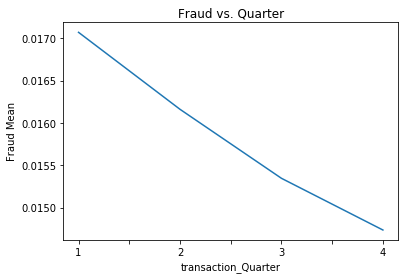

In [267]:
ax = raw_df.groupby('transaction_Quarter')['isFraud'].mean().plot(
    title = 'Fraud vs. Quarter')

ax.set_ylabel("Fraud Mean")

ax.plot()

- The relationship is still very much visible with quarters. There's also a very similar number of transactions per quarter with more transactions on the last two

### Identifying and removing duplicates

Types of duplicates:
1. One type of duplicated transaction is a reversed transaction, where a purchase is followed by a reversal.
2. Another example is a multi-swipe, where a vendor accidentally charges a customer's card multiple times within a short time span.

**1. Purchase followed by reversal**

In [268]:
grouped_df = raw_df.groupby('accountNumber').apply(lambda x: x.sort_values('transactionDateTime'))
grouped_df.head()

accountNumber customerId  creditLimit  availableMoney  \
accountNumber                                                                
100088067     541900     100088067  100088067      50000.0        50000.00   
              541901     100088067  100088067      50000.0        49794.87   
              541902     100088067  100088067      50000.0        49748.44   
              541903     100088067  100088067      50000.0        50000.00   
              541904     100088067  100088067      50000.0        49933.93   

                     transactionDateTime  transactionAmount  \
accountNumber                                                 
100088067     541900 2016-01-12 00:59:52             205.13   
              541901 2016-01-12 19:49:41              46.43   
              541902 2016-01-17 15:41:46             378.67   
              541903 2016-02-02 19:57:18              66.07   
              541904 2016-02-03 04:48:54             141.60   

                                        merchantName acqCountry  \
accountNumber                                                     
100088067     541900            EZ Putt Putt #982199         US   
              541901  Dinosaur Sandwitch Bar #303701         US   
              541902                   Mobile eCards         US   
              541903             EZ Putt Putt #40513         US   
              541904                34th BBQ #412895         US   

                     merchantCountryCode posEntryMode  ... cardLast4Digits  \
accountNumber                                          ...                   
100088067     541900                  US           02  ...            4615   
              541901                  US           05  ...            4615   
              541902                  US           05  ...            2077   
              541903                  US           02  ...            4615   
              541904                  US           09  ...            4615   

                     transactionType currentBalance cardPresent  \
accountNumber                                                     
100088067     541900        PURCHASE           0.00           1   
              541901        PURCHASE         205.13           1   
              541902        PURCHASE         251.56           0   
              541903        PURCHASE           0.00           1   
              541904        PURCHASE          66.07           1   

                     expirationDateKeyInMatch isFraud transaction_Day  \
accountNumber                                                           
100088067     541900                        0       0      2016-01-12   
              541901                        0       0      2016-01-12   
              541902                        0       0      2016-01-17   
              541903                        0       0      2016-02-02   
              541904                        0       0      2016-02-03   

                     transaction_Week transaction_Month  transaction_Quarter  
accountNumber                                                                 
100088067     541900                2                 1                    1  
              541901                2                 1                    1  
              541902                2                 1                    1  
              541903                5                 2                    1  
              541904                5                 2                    1  

[5 rows x 27 columns]

In [269]:
grouped_df['all_trans'] = np.where(grouped_df['transactionType'] == 'REVERSAL',
                                   grouped_df['transactionAmount']*-1, grouped_df['transactionAmount'])
grouped_df['last2_trans'] = grouped_df['all_trans'].rolling(2).sum()

In [270]:
rt_cols = ['accountNumber','customerId','transactionDateTime', 'transactionType', 'transactionAmount','last2_trans']

In [271]:
reversed_transactions = grouped_df[(grouped_df['last2_trans'] == 0) & 
                                   (grouped_df['transactionType'] != "ADDRESS_VERIFICATION")][rt_cols]

reversed_transactions

,,accountNumber,customerId,transactionDateTime,transactionType,transactionAmount,last2_trans
accountNumber,,,,,,,
131007981,665601,131007981,131007981,2016-10-24 18:11:39,REVERSAL,190.63,0.0
472288969,699994,472288969,472288969,2016-12-16 06:32:32,REVERSAL,708.46,0.0
577802389,66717,577802389,577802389,2016-11-01 03:35:47,REVERSAL,323.30,0.0
596028898,73569,596028898,596028898,2016-05-15 22:53:19,REVERSAL,166.31,0.0
655864583,459156,655864583,655864583,2016-05-21 10:47:06,REVERSAL,86.29,0.0
675396999,357550,675396999,675396999,2016-01-26 19:16:12,REVERSAL,5.61,0.0
975471147,478484,975471147,975471147,2016-10-02 19:16:55,REVERSAL,21.67,0.0


In [272]:
print("The total transaction amount from reversed transactions is: {}".\
      format(sum(reversed_transactions['transactionAmount'])))

The total transaction amount from reversed transactions is: 1502.27


Identifying original and reserved transactions to verify

In [273]:
reversed_transactions.reset_index(drop=True, inplace=True) 

In [274]:
grouped_df.reset_index(drop=True, inplace=True) 

In [275]:
test_dups = pd.merge(reversed_transactions[['customerId', 'transactionAmount']], grouped_df ,
         how = 'inner', on = ['customerId', 'transactionAmount'])

test_dups[['customerId','transactionDateTime', 'transactionType', 'transactionAmount','last2_trans', 'merchantName', 'isFraud']]

,customerId,transactionDateTime,transactionType,transactionAmount,last2_trans,merchantName,isFraud
0,131007981,2016-10-24 18:11:37,PURCHASE,190.63,247.16,EZ Putt Putt #755869,1
1,131007981,2016-10-24 18:11:39,REVERSAL,190.63,0.00,EZ Putt Putt #755869,1
2,472288969,2016-12-16 06:31:37,PURCHASE,708.46,896.70,United Airlines,0
3,472288969,2016-12-16 06:32:32,REVERSAL,708.46,0.00,United Airlines,0
4,577802389,2016-11-01 03:35:17,PURCHASE,323.30,425.49,Fresh Flowers,0
5,577802389,2016-11-01 03:35:47,REVERSAL,323.30,0.00,Fresh Flowers,0
6,596028898,2016-05-15 22:50:44,PURCHASE,166.31,166.31,American Airlines,0
7,596028898,2016-05-15 22:53:19,REVERSAL,166.31,0.00,American Airlines,0
8,655864583,2016-05-21 10:46:23,PURCHASE,86.29,875.88,Uber,0
9,655864583,2016-05-21 10:47:06,REVERSAL,86.29,0.00,Uber,0


- It looks right!

**2.  Multi-swipe -  where a vendor accidentally charges a customer's card multiple times within a short time span.**

To identify multi-swipes, a time parameter will be introduced to classify the transactions (if the same transaction amount was charged more than once, by the same merchant, within x minutes)

In [276]:
  
def find_multiswipe(df, minutes):   
    
    df[['trans_lagged', "datetime_lagged", "merchant_lagged"]] = df.sort_values("transactionDateTime",\
        ascending=True).groupby(['accountNumber'])\
        ['transactionAmount', 'transactionDateTime', 'merchantName'].shift(1)

    df['same_transVal'] = np.where((df['trans_lagged'] == df['transactionAmount']) &
                                            (df['merchantName'] == df['merchant_lagged']) &
                                            ((df['transactionDateTime'] - df['datetime_lagged'])/
                                             np.timedelta64(1, 'm') <= minutes) ,
                                            1, 0)

    cols = ['accountNumber','customerId','transactionDateTime',"datetime_lagged", "isFraud",
            'transactionType', 'transactionAmount', "trans_lagged", 'merchantName', 'merchant_lagged']

    multi_swipe = df[(df['same_transVal'] == 1) & (df['transactionType'] == "PURCHASE")][cols]
    
    total_amt = multi_swipe['transactionAmount'].sum()
    
    return multi_swipe, total_amt

In [277]:
for minutes in [1, 5, 10, 20]:

    multi_swipe, amt = find_multiswipe(grouped_df, minutes)
    
    print("Within {} minutes, {} multi-swipes were identified totaling {} dollars".format(
    minutes, len(multi_swipe), round(amt, 2)) )  

Within 1 minutes, 2479 multi-swipes were identified totaling 377621.02 dollars
Within 5 minutes, 7372 multi-swipes were identified totaling 1090684.28 dollars
Within 10 minutes, 7372 multi-swipes were identified totaling 1090684.28 dollars
Within 20 minutes, 7372 multi-swipes were identified totaling 1090684.28 dollars


- It looks like multiswipes can happen in over a minute but they don't seem to change after 5 minutes.
- To be more conversative, 5 minutes will be used

In [278]:
multi_swipe, amt = find_multiswipe(grouped_df, 5)
print("The total estimate in multi-swipe transactions is {}".format(round(amt, 2)))

The total estimate in multi-swipe transactions is 1090684.28


In [279]:
print(multi_swipe.shape[0])
multi_swipe.head()

7372


,accountNumber,customerId,transactionDateTime,datetime_lagged,isFraud,transactionType,transactionAmount,trans_lagged,merchantName,merchant_lagged
56,100088067,100088067,2016-10-16 18:01:02,2016-10-16 18:01:00,0,PURCHASE,411.35,411.35,Fresh Flowers,Fresh Flowers
233,100737756,100737756,2016-01-18 01:55:28,2016-01-18 01:55:24,0,PURCHASE,693.50,693.50,Franks Deli,Franks Deli
234,100737756,100737756,2016-01-18 01:58:26,2016-01-18 01:55:28,0,PURCHASE,693.50,693.50,Franks Deli,Franks Deli
319,100737756,100737756,2016-07-02 12:07:00,2016-07-02 12:05:04,0,PURCHASE,211.22,211.22,South Steakhouse #73819,South Steakhouse #73819
324,100737756,100737756,2016-07-10 14:32:06,2016-07-10 14:31:07,0,PURCHASE,43.25,43.25,34th BBQ #166379,34th BBQ #166379


In [280]:
multi_swipe.isFraud.value_counts()

0    7246
1     126
Name: isFraud, dtype: int64

- That is a good bit of fraudulent labaled multi-swipes. If this is a form of "fraud", it could be worth introducing a rules-based check to flag these as opposed to a model since it's straight forward

**Removing duplicates identified**

In [281]:
processed_df = pd.merge(raw_df, multi_swipe[['accountNumber','transactionDateTime', 'trans_lagged']],
                        how = "left", on = ['accountNumber','transactionDateTime']
                       )

In [282]:
processed_df = pd.merge(processed_df, reversed_transactions[['accountNumber','transactionDateTime', 'last2_trans']],
                        how = "left", on = ['accountNumber','transactionDateTime']
                       )

In [283]:
#Filtering to only the rows where matches with dups were not identified
processed_df = processed_df[(processed_df['trans_lagged'].isnull()) & (processed_df['last2_trans'].isnull())]

In [284]:
processed_df.drop(['trans_lagged', 'last2_trans'], axis=1, inplace=True)


In [285]:
remaining_dups = processed_df[processed_df[['accountNumber','transactionDateTime']].duplicated(keep=False)]
print("Number of what appears remaning duplicates: {}".format(remaining_dups.shape[0]))
remaining_dups.head()

Number of what appears remaning duplicates: 78


,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,transaction_Day,transaction_Week,transaction_Month,transaction_Quarter
14267,893468720,893468720,7500.0,3372.89,2016-11-08 01:42:26,4.27,Apple iTunes,US,US,02,...,7784,PURCHASE,4127.11,0,0,0,2016-11-08,45,11,4
14268,893468720,893468720,7500.0,3368.62,2016-11-08 01:42:26,2.09,Rodeway Inn #268900,US,US,02,...,7784,PURCHASE,4131.38,0,0,0,2016-11-08,45,11,4
53149,246251253,246251253,5000.0,2838.87,2016-05-14 20:19:25,124.10,Wendys #686604,US,US,09,...,6002,PURCHASE,2161.13,1,0,0,2016-05-14,19,5,2
53150,246251253,246251253,5000.0,2714.77,2016-05-14 20:19:25,133.98,amazon.com,US,US,05,...,6002,PURCHASE,2285.23,0,0,0,2016-05-14,19,5,2
53956,246251253,246251253,5000.0,1141.33,2016-06-12 20:20:22,186.28,cheapfast.com,US,US,02,...,6002,PURCHASE,3858.67,0,0,0,2016-06-12,23,6,2


In [286]:
remaining_dups.isFraud.value_counts()

0    77
1     1
Name: isFraud, dtype: int64

- There are transactions that occurred at the same time but come from different merchants which could be possible (i.e., online and physical purchase)

## Modeling

### Feature Engineering

**Identifying if the card last 4 digits were inputed correctly**

In [287]:
processed_df['bad_cardCVV'] = np.where(processed_df.cardCVV != processed_df.enteredCVV, 1 ,0)

In [288]:
processed_df.bad_cardCVV.value_counts()

0    772041
1      6942
Name: bad_cardCVV, dtype: int64

In [289]:
processed_df.groupby('bad_cardCVV')['isFraud'].mean()

bad_cardCVV
0    0.015661
1    0.028666
Name: isFraud, dtype: float64

- There some instances and they seem to indicate a higher chance of fraud

**Features for deltas between transaction time and key credit card dates**

In [290]:
processed_df['days_sinceAddressChange'] = (processed_df['transaction_Day'] - \
    pd.to_datetime(processed_df['dateOfLastAddressChange']).dt.date).dt.days

processed_df['days_sinceOpenAcc'] = (processed_df['transaction_Day']- \
    pd.to_datetime(processed_df['accountOpenDate']).dt.date).dt.days

processed_df['days_fromExp'] = (pd.to_datetime(processed_df['currentExpDate']).dt.date - \
    processed_df['transaction_Day']).dt.days


Analyzing relationship between new features and fraud

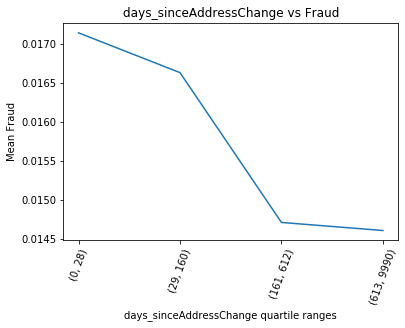

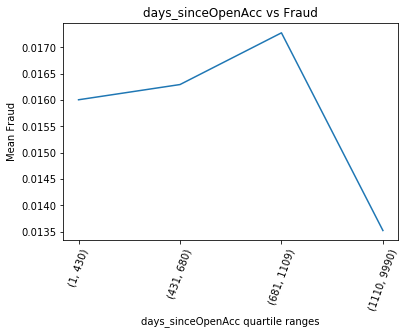

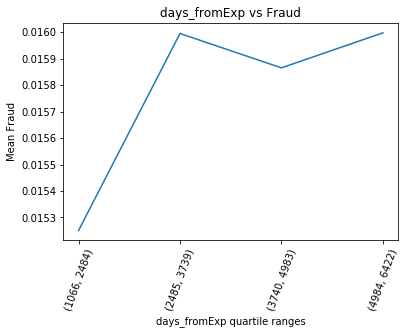

In [291]:
tmp = pd.DataFrame()
for i in ['days_sinceAddressChange','days_sinceOpenAcc', 'days_fromExp']:
    
    processed_df['ntile'] = pd.qcut(processed_df[i], 4, labels=False)

    ntile_ranges = processed_df.groupby('ntile').agg({i:{'min', 'max', 'count'}})

    ntile_ranges.columns = ["_".join(x) for x in ntile_ranges.columns.ravel()]

    ranges = [((round(j[1][i+"_min"], 2), round(j[1][i+"_max"], 2))) for j in ntile_ranges.iterrows()] 

    
    ax = processed_df.groupby('ntile')['isFraud'].mean().plot(label='category: {}'.format(i))
        
    ax.set_title("{} vs Fraud".format(i))
    ax.set_xlabel("{} quartile ranges".format(i))
    ax.set_ylabel("Mean Fraud")
    plt.xticks(list(range(len(ranges))), ranges, rotation = 70)
    
    del processed_df['ntile']

    plt.show()




- The less days since address change, the more fraud
- The more days form expiration the more fraud - maybe because people are creating new fradulent cards with new expirations?
- Days since open account has a more complex non-linear relationship

**Fraud patterns per hour**

In [292]:
processed_df['hour'] = processed_df['transactionDateTime'].dt.hour

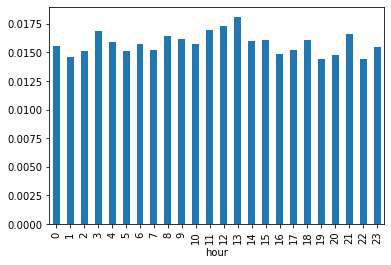

In [293]:
processed_df.groupby(['hour'])['isFraud'].mean().plot.bar()

In [294]:
processed_df['hour_sin'] = np.sin(2* np.pi * processed_df['hour']/23.0)
processed_df['hour_cos'] = np.cos(2* np.pi * processed_df['hour']/23.0)

In [295]:
del processed_df['hour'] 

- There seems to be a patternso hour features are created using sine and cosine encoding

**Number of credict cards per account number**

In [296]:
processed_df.groupby('accountNumber')['cardLast4Digits'].nunique().describe()

count    5000.000000
mean        1.476000
std         0.686963
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         6.000000
Name: cardLast4Digits, dtype: float64

In [297]:
processed_df['num_cards'] = processed_df['accountNumber'].map(
    processed_df.groupby('accountNumber')['cardLast4Digits'].nunique().to_dict())

In [298]:
processed_df.groupby(['num_cards'])['isFraud'].mean()

num_cards
1    0.015548
2    0.016973
3    0.013054
4    0.012327
5    0.020661
6    0.000000
Name: isFraud, dtype: float64

- It appears that some users had up to 6 cards, I assume these could of course be a result of updates or lost credit cards which is a limitation for this feature
- There doesn't seem to be a clear fraud pattern as a function of the number of cards

**Previous transactions and running total per month and per week**

In [299]:
processed_df = processed_df.sort_values("transactionDateTime", ascending=True)

processed_df['nPrior_transactions_pDay'] = processed_df\
    .groupby(['accountNumber', 'transaction_Day'])['transaction_Day'].cumcount()

processed_df['nPrior_transactions_pWeek'] = processed_df\
    .groupby(['accountNumber', 'transaction_Week'])['transaction_Week'].cumcount()

processed_df['nPrior_transactions_pMonth'] = processed_df\
    .groupby(['accountNumber', 'transaction_Month'])['transaction_Month'].cumcount()

processed_df['prior_transtot_pday'] = processed_df\
    .groupby(['accountNumber', 'transaction_Day'])['transactionAmount'].cumsum() 


processed_df['prior_transtot_pweek'] = processed_df\
    .groupby(['accountNumber', 'transaction_Week'])['transactionAmount'].cumsum() 

processed_df['prior_transtot_pmonth'] = processed_df\
    .groupby(['accountNumber', 'transaction_Month'])['transactionAmount'].cumsum() 

**Features to capture if the previous merchant and country codes were the same as the current ones**

In [300]:
processed_df[['last_aqcode', 'last_merchantcode' ]] = processed_df.sort_values("transactionDateTime", ascending=True)\
    .groupby(['accountNumber'])[['acqCountry', 'merchantCountryCode']].shift(1)

processed_df[['acqCountry', 'merchantCountryCode']].replace(np.nan, "None", inplace =True)

processed_df['same_aqcode_last'] = np.where((processed_df['acqCountry'] == processed_df['last_aqcode']) |
                                            (processed_df['last_aqcode'].isnull()),1, 0)
             
processed_df['same_merchantcode_last'] = np.where((processed_df['merchantCountryCode'] == 
                                                   processed_df['last_merchantcode']) |
                                            (processed_df['last_merchantcode'].isnull()),1, 0)


processed_df[['acqCountry', 'merchantCountryCode']].replace("None", np.nan, inplace =True)


del processed_df['last_aqcode'], processed_df['last_merchantcode']

In [301]:
processed_df['same_merchantcode_last'].value_counts()

1    764692
0     14291
Name: same_merchantcode_last, dtype: int64

In [302]:
processed_df['same_aqcode_last'].value_counts()

1    761126
0     17857
Name: same_aqcode_last, dtype: int64

**Features that capture the delta between the transaction value and the moving average over a window**

In [303]:
def delta_from_ma(df, windows):
    
    for i in windows:
        
        col_name = 'ma_'+ str(i)
        processed_df[col_name] = processed_df['transactionAmount'] - \
            processed_df.sort_values("transactionDateTime", ascending=True)\
            .groupby(['accountNumber'])['transactionAmount'].rolling(i).mean().reset_index(0,drop=True)
        
        #If it's too early in the cycle to compute, set delta as 0
        processed_df[col_name] = np.where(processed_df[col_name].isnull() ,0,
                               processed_df[col_name])
        
    return processed_df

In [307]:
processed_df = delta_from_ma(processed_df, [2, 5, 20, 40, 80])

**Time between current and last transaction and moving average**

In [308]:
processed_df['time_from_last'] = processed_df.sort_values("transactionDateTime", ascending=True)\
    .groupby(['accountNumber'])['transactionDateTime'].diff(1) / np.timedelta64(1, 'h')

#If it's the 1st transactin for the account, impute with the mean
processed_df['time_from_last'].replace(np.nan, processed_df['time_from_last'].mean(), inplace = True)

processed_df['time_from_last_ma_5'] = processed_df.sort_values("transactionDateTime", ascending=True)\
    .groupby(['accountNumber'])['time_from_last'].rolling(5).mean().reset_index(0,drop=True)

#If it's too early in the cycle to compute the rolling avg, impute with the current time from last
processed_df['time_from_last_ma_5'] = np.where(processed_df['time_from_last_ma_5'].isnull() ,
                                               processed_df['time_from_last'],
                               processed_df['time_from_last_ma_5'])

In [309]:
processed_df['time_from_last'].describe()

count    778983.000000
mean         51.397171
std         148.944764
min           0.000000
25%           1.960556
50%           9.773056
75%          41.135694
max        7875.848889
Name: time_from_last, dtype: float64

- It looks like the time between transactions can vary a lot as expected

Check dataframe and ispect new cumulative / time-based features

In [310]:
processed_df[['accountNumber', 'transactionDateTime', 'transaction_Day', 
              'transaction_Week', 'transactionAmount',
              'prior_transtot_pday', 'time_from_last',
              'time_from_last_ma_5', 'same_merchantcode_last'
             ]].sort_values(["accountNumber", "transactionDateTime"]).head(10)

,accountNumber,transactionDateTime,transaction_Day,transaction_Week,transactionAmount,prior_transtot_pday,time_from_last,time_from_last_ma_5,same_merchantcode_last
541900,100088067,2016-01-12 00:59:52,2016-01-12,2,205.13,205.13,51.397171,51.397171,1
541901,100088067,2016-01-12 19:49:41,2016-01-12,2,46.43,251.56,18.830278,18.830278,1
541902,100088067,2016-01-17 15:41:46,2016-01-17,2,378.67,378.67,115.868056,115.868056,1
541903,100088067,2016-02-02 19:57:18,2016-02-02,5,66.07,66.07,388.258889,388.258889,1
541904,100088067,2016-02-03 04:48:54,2016-02-03,5,141.60,141.60,8.860000,116.642879,1
541905,100088067,2016-02-08 06:09:12,2016-02-08,6,259.44,259.44,121.338333,130.631111,1
541906,100088067,2016-02-09 18:36:53,2016-02-09,6,32.50,32.50,36.461389,134.157333,1
541907,100088067,2016-02-09 23:44:13,2016-02-09,6,23.06,55.56,5.122222,112.008167,1
541908,100088067,2016-02-13 20:17:41,2016-02-13,6,56.05,56.05,92.557778,52.867944,1
541909,100088067,2016-02-21 01:14:56,2016-02-21,7,71.35,71.35,172.954167,85.686778,1


- Looks right!

### Missing values

Take a look at the missing values per column again

In [311]:
some_missing_cols

acqCountry             4562
merchantCountryCode     724
posEntryMode           4054
posConditionCode        409
transactionType         698
dtype: int64

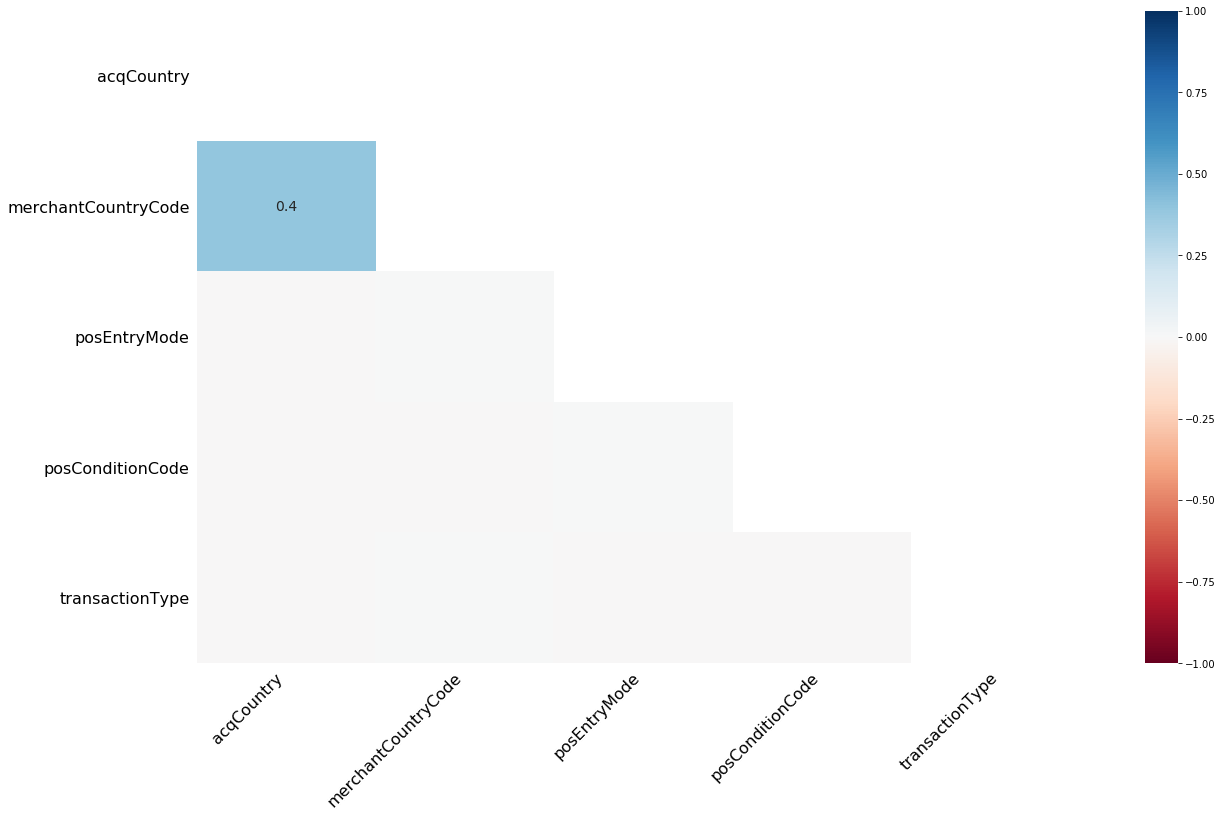

In [312]:
import missingno as msno
msno.heatmap(processed_df)

In [313]:
for i in some_missing_cols.index:
    
    current_col = i + "_nan"
    
    processed_df[current_col] = np.where(processed_df[i].isnull(), "NaN", "Not NaN")
    print('{} Total NaN count: {}'.format(i, len(processed_df[processed_df[current_col] == "NaN"])))
    print('\n')
    print(processed_df.groupby(current_col)['isFraud'].mean())
    
    
    del processed_df[current_col]
    print('\n\n')


acqCountry Total NaN count: 4528


acqCountry_nan
NaN        0.032906
Not NaN    0.015677
Name: isFraud, dtype: float64



merchantCountryCode Total NaN count: 723


merchantCountryCode_nan
NaN        0.113416
Not NaN    0.015686
Name: isFraud, dtype: float64



posEntryMode Total NaN count: 4010


posEntryMode_nan
NaN        0.066334
Not NaN    0.015515
Name: isFraud, dtype: float64



posConditionCode Total NaN count: 406


posConditionCode_nan
NaN        0.054187
Not NaN    0.015757
Name: isFraud, dtype: float64



transactionType Total NaN count: 698


transactionType_nan
NaN        0.020057
Not NaN    0.015773
Name: isFraud, dtype: float64





- There are a very few number of values missing
- The only apparent correlation in missingness appears to be between merchantCountrycode and acqCountry which makes sense
- Lastly, across the board, it looks like missing values correspond to higher fraud rates

**Create number of missing values per record feature**

In [314]:
processed_df['num_missing'] = processed_df.isnull().sum(axis=1)
processed_df['num_missing'].value_counts()

0    769369
1      8869
2       739
3         6
Name: num_missing, dtype: int64

In [315]:
processed_df.groupby(['num_missing'])['isFraud'].mean()

num_missing
0    0.015392
1    0.041042
2    0.112314
3    0.166667
Name: isFraud, dtype: float64

- It does appear that the more missing values, the more fraud

**Handling missing values**

Although it appears that these values are not missing at random and a multivariate-based imputation (e.g., MICE, K-nn) would be the ideal approach, given the few values missing and the large dataset, mode imputation will be used.

In [316]:

def mode_impute(df, missing_cols):

    for i in missing_cols:

        mode = df[i].value_counts().index[0]

        df[i] = df[i].replace(np.nan, mode)

    
    return df

In [317]:
processed_df = mode_impute(processed_df, some_missing_cols.index.to_list())

In [318]:
print("Number of remaining missing values in dataframe {}".format(sum(processed_df.isnull().sum())))

Number of remaining missing values in dataframe 0


In [319]:
non_features = ['accountNumber', 'customerId', 'merchantName','transactionDateTime', 'currentExpDate', 
                'accountOpenDate','dateOfLastAddressChange', 'cardCVV', 'enteredCVV', 'cardLast4Digits',
                'transaction_Day','transaction_Week', 'transaction_Month']

In [320]:
modeling_df = processed_df[[i for i in processed_df.columns if i not in non_features]]

### Encode categorical features

In [321]:
obj_cols = modeling_df.columns[modeling_df.dtypes == "object"]

modeling_df[obj_cols].nunique()

acqCountry               4
merchantCountryCode      4
posEntryMode             5
posConditionCode         3
merchantCategoryCode    19
transactionType          3
transaction_Quarter      4
dtype: int64

- From the categorical features, as a first pass, handling all of them as one hot encoded features would be a good approach, except for merchantCategoryCode
- Merchant category code has a lot of levels which could blow up the dimensions of the data and sparsity

Analyze merchantCategoryCode frequencies and relationships with Fraud

In [322]:
with pd.option_context('display.max_rows', None):
    print(modeling_df.merchantCategoryCode.value_counts())#Let's look at number of unique values per column

online_retail           200111
fastfood                110949
entertainment            79242
food                     74727
online_gifts             65610
rideshare                50629
hotels                   33764
fuel                     23910
subscriptions            22669
auto                     21449
health                   18907
personal care            18757
airline                  15240
mobileapps               14990
online_subscriptions     11067
furniture                 7371
food_delivery             6000
gym                       2209
cable/phone               1382
Name: merchantCategoryCode, dtype: int64


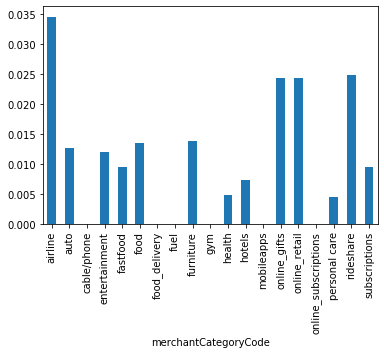

In [323]:
modeling_df.groupby('merchantCategoryCode')['isFraud'].mean().plot.bar()

- There are definitely levels with potentially to few records to be significant (e.g., gym and cable/phone)
- There are also some categories that are clearly more prone to fraud (e.g., airline, online_gifts, oneline_retail, and rideshare)

**Identify top 4 fradulent categories**

In [324]:
top_merchants_fraud = modeling_df.groupby('merchantCategoryCode')['isFraud'].mean()\
    .sort_values(ascending = False).index[0:4].to_list()

top_merchants_fraud

['airline', 'rideshare', 'online_retail', 'online_gifts']

**Identify categories that account for greater than 5% of the transactions**

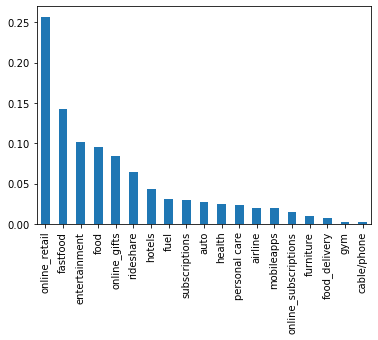

In [325]:
merchatn_percent = modeling_df.merchantCategoryCode.value_counts(normalize =True)

merchatn_percent.plot.bar()

In [326]:
top_merchants = merchatn_percent[merchatn_percent> .05].index.to_list()
top_merchants

['online_retail',
 'fastfood',
 'entertainment',
 'food',
 'online_gifts',
 'rideshare']

**Identify list of levels that will be maintained by taking distinct elements between top merchants and top fraud categories**

In [327]:
merchant_levels = set(top_merchants_fraud+ top_merchants)
merchant_levels

{'airline',
 'entertainment',
 'fastfood',
 'food',
 'online_gifts',
 'online_retail',
 'rideshare'}

Remaining categories will be bucketed into an "other" category

In [328]:
modeling_df['merchant_feature'] = np.where(modeling_df['merchantCategoryCode'].isin(merchant_levels),
                                           modeling_df['merchantCategoryCode'], "other")

In [329]:
del modeling_df['merchantCategoryCode'] 

### One-hot-encoding

In [330]:
#update obj_cols
obj_cols = modeling_df.select_dtypes(include='object').columns
obj_cols

Index(['acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode',
       'transactionType', 'transaction_Quarter', 'merchant_feature'],
      dtype='object')

In [331]:
one_hot_df = pd.get_dummies(modeling_df[obj_cols])

print("Converted {} categorical features into {} one hot encoded features".format(len(obj_cols), one_hot_df.shape[1]))


Converted 7 categorical features into 31 one hot encoded features


Update modeling dataset

In [332]:
modeling_df = pd.concat([modeling_df, one_hot_df], axis=1)
modeling_df.drop(obj_cols, axis=1, inplace=True)

### Model Building

Get final list of features

In [333]:
features = [i for i in modeling_df.columns if i != "isFraud"]
# print(features)
len(features)

60

Import libraries

In [334]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTENC
from imblearn.pipeline import Pipeline

Create test hold out set and training set

In [335]:
#First split the data into X and y

X = modeling_df[features]
y = modeling_df['isFraud']

#Stratify given the small size of the fraud class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    stratify=y, random_state = SEED) 

In [336]:
class_size = y_train.value_counts()
class_size

0    613354
1      9832
Name: isFraud, dtype: int64

**Mitigating imbalanced class**

To mitigate the impacts of the imbalanced classes, oversampling with a synthetic data approach like SMOTE is preferred. Given the large dataset (700k+ rows) and computing limitations, a strong undersampling approach will be combined with SMOTE ovesampling - combinations of undersampling and SMOTE oversampling have been known to perform well in the literature.

- Undersampling - For undersampling, a basic non-computationally intensive random undersampling will be applied. This runs the risk of losing important datapoints but will run faster. Further iterations could explore more sohisticated approaches
- Oversampling - SMOTENC is used, a SMOTE (knn) based approach that can handle categorical features

Estimate size of training set to get an idea of the workload for a classifier:

As a first pass, the approach will be to
1. Randomly undersample the majority class using a ratio of #minority/#majority = N
2. SMOTE will then be used to oversample the minority class until a balanced class is reached

Size of minority class in training set x Percent used for CV x 1/N x 2

With N = .5 the estimate training set for a model in each training 5-fold CV iteration is:

In [337]:
class_size[1] *.8 *1/.5*2

31462.4

Find binary columns to map accordingly in SMOTENC

In [338]:

def get_bin_cols(df, features):
    
    bin_cols = {}
    for idx, val in enumerate(features):

        if sorted(df[val].unique()) == [0, 1]:
            
            bin_cols[idx] = val
        
    return bin_cols

In [339]:
bin_cols = get_bin_cols(X, features)


In [340]:
undersample = RandomUnderSampler(sampling_strategy = .5, random_state=SEED)
smote_nc = SMOTENC(categorical_features=list(bin_cols.keys()), random_state=SEED)

**Model Selection**

As a model, random forest will be used as it's known to be generally robust to outliers, and good with featuresets that include many categorical features, and also a model that can be parallelized. 

A Grid search approach will be used where 9 different models will be ran and tested in a CV to tune the random forest.

In [341]:
rfc = RandomForestClassifier(random_state = SEED)

In [342]:
grid_param = {
        'classification_rf__n_estimators': [100, 300, 750],    
        'classification_rf__max_depth': [5, 8, 10]
}

**Model Training and Evaluation**

To train, select the best model, and evaluate out of sample, the following approach is implemented through imblearn pipeline.

1. Break up data into train and test
2. With the training set, for each k-fold, split into train and validation
3. With each k-fold train split, undersample, oversample, and train the random forest grid-models and validate them in the k-fold validation set in that order
4. Identify the best model based on the grid-search across all folds
5. Test out of sample on original test (unseen) hold out set

In [343]:
model = Pipeline([
        ('under_sampling', undersample),
        ('over_sampling', smote_nc),
        ('classification_rf', rfc)
    ])

In [344]:
start = time.time()

#optimizing on f1 due to imbalance
grid = GridSearchCV(model, grid_param, verbose = 3, 
                    cv= 5, n_jobs=5, scoring= 'f1', return_train_score = True) 

grid.fit(X, y)

print((time.time() - start)/60)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
16.620679231484733


In [345]:
print("Best model:\n")

print(grid.best_params_)

Best model:

{'classification_rf__max_depth': 10, 'classification_rf__n_estimators': 300}


**Assess performance on the training set to be able to compare with test set performance**

In [346]:
grid_predictions = grid.predict(X_train) 

In [347]:
print(metrics.classification_report(y_train,grid_predictions))

              precision    recall  f1-score   support

           0       0.99      0.78      0.88    613354
           1       0.05      0.67      0.09      9832

    accuracy                           0.78    623186
   macro avg       0.52      0.73      0.48    623186
weighted avg       0.98      0.78      0.86    623186



In [348]:
grid_predictions = grid.predict(X_test) 

**Assess performance on the hold out set**

In [349]:
print(metrics.classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.99      0.78      0.87    153339
           1       0.05      0.65      0.08      2458

    accuracy                           0.78    155797
   macro avg       0.52      0.71      0.48    155797
weighted avg       0.98      0.78      0.86    155797



In [350]:
print("There were {} fraud predictions out of {} total predictions".format(
    sum(grid_predictions), len(grid_predictions)))

There were 35074 fraud predictions out of 155797 total predictions


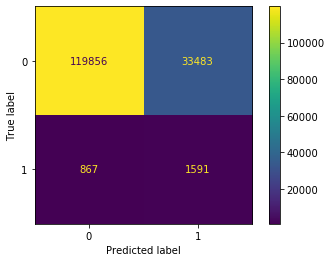

In [351]:
metrics.plot_confusion_matrix(grid.best_estimator_, X_test, y_test, values_format = '.0f')

- Performance on test set is only slightly worse than on the training set which indicates no large overfitting is present 
- While the precision of this model is very low (.05) which means that a lot of transactions are being labeled as fraud incorrectly, recall (.65) is picking up signal
- For this fraud detection problem, recall is likely the most important metric as even though it can be intrusive to flag so many wrong transactions as fradulent, customers are likely a lot more prone to take their business elsewhere due to fraud.
- This Model is not good overall, but if there was nothing else in place, a low precision, high recall model could be implemented in conjunction with SMS verification sent to suspect customers

### Feature Importance

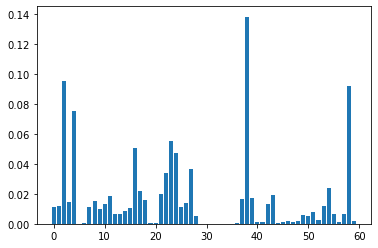

In [352]:
importance = grid.best_estimator_[2].feature_importances_

feature_importance = {}
# summarize feature importance
for i,v in enumerate(importance):

    feature_importance[features[i]] = v

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [353]:
print("Most important features:\n")
sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)[0:20]

Most important features:



[('posEntryMode_05', 0.13803845243906998),
 ('transactionAmount', 0.0955163288055044),
 ('merchant_feature_other', 0.09209479621954515),
 ('cardPresent', 0.07503494943269326),
 ('ma_20', 0.05497415112652977),
 ('prior_transtot_pday', 0.050443893283350846),
 ('ma_40', 0.047307973425484914),
 ('ma_80', 0.0365404922364079),
 ('ma_5', 0.034028852416460344),
 ('merchant_feature_fastfood', 0.024136133911514732),
 ('prior_transtot_pweek', 0.022095275932322498),
 ('ma_2', 0.019951535318393252),
 ('posConditionCode_08', 0.018918262777335385),
 ('hour_cos', 0.018683258674980018),
 ('posEntryMode_09', 0.017425767718748382),
 ('posEntryMode_02', 0.01627658361991877),
 ('prior_transtot_pmonth', 0.016146481255942192),
 ('days_sinceOpenAcc', 0.014880742869986481),
 ('currentBalance', 0.014330629003797987),
 ('time_from_last_ma_5', 0.01375365451882422)]

### Potential Future Improvements

- Data subset/labels:
    - Subset the data (or include more data) such that running totals, maving averages, etc, can be computed with earlier records
    - Understand the meaning of the label, why there is a downtrending fraud over time
- Data pre-processing:
    - Investigate outliers and thier effect on modeling. Adjust as needed using statistical techniques such as winsorization
    - Random forest does not require feature standardization or scaling but it could benefit it as well as make the data model-ready for other modeling approaches
    - Impute missing values using a supervised approach such as MICE or Knn
- Feature engineering:
    - Revisit heuristics to engineer features such as defining the number of buckets to truncate merchant code into, or encoding approach
    - Thorough and comprehensive data analysis that identifies strong and weak features for model
    - Incorporate more features from existing data such as day of week, running totals of transaction amounts by quarter, etc
    - Investigate fradulent trends and common schemes to engineer features that may capture them (network/graph type patterns)
- Sampling:
    - Tune sampling approach - as premitted by computing resources, test different sampling ratios, and approaches
- Model: 
    - Experiment with other approaches such as xgboost and deep learning-based as computing resources permit
    - More thourough hyperparameter tuning - use bayesian optimization if resources permit
    - Experimenting with different class weights using different models could be another way to tackle the imbalanced problem
    